In [1]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#from negotovost import Negotovost

In [55]:
rho = 0.973 # gcm-3
rho_zr = 1.204e-6 # gcm-3

rho_skp = rho - rho_zr

nu = 18.3 # u Pa s

g = 9.81 # m/s2

d = 5 # mm

In [65]:
metoda1 = pd.read_csv('./Millik_podatki/meritve/metoda1_in_opis.txt',skiprows=4)
metoda1['r [um]'] = np.sqrt( 9*nu*metoda1['v [um/s]'] / (2*rho_skp*g) ) / 10**(1.5)

In [66]:
metoda1['ne_0 [aC]'] = 4*np.pi/3*metoda1['r [um]']**3*rho_skp*g/(metoda1['U[V]']/d)

In [134]:
metoda1['n'] = np.intc(np.round(metoda1['ne_0 [aC]']/metoda1['ne_0 [aC]'].min(),0))
metoda1 = metoda1.sort_values(by='ne_0 [aC]')
metoda1['e_0 [aC]'] = metoda1['ne_0 [aC]'] / metoda1['n']

names = ['v [$\mu$m/s]','U [V]','r [$\mu$m]','$ne_0$ [aC]','n','$e_0$ [aC]']

print(metoda1.to_latex(escape=False,caption='Tabela po metodi 1',index=False,float_format="%.2f",header=names))

\begin{table}
\centering
\caption{Tabela po metodi 1}
\begin{tabular}{rrrrrr}
\toprule
v [$\mu$m/s] &  U [V] & r [$\mu$m] & $ne_0$ [aC] & n & $e_0$ [aC] \\
\midrule
       30.40 & 194.00 &       0.51 &        0.14 & 1 &       0.14 \\
       27.10 & 153.00 &       0.48 &        0.15 & 1 &       0.15 \\
       24.60 & 127.00 &       0.46 &        0.15 & 1 &       0.15 \\
       22.80 & 113.00 &       0.44 &        0.15 & 1 &       0.15 \\
        8.75 &  26.30 &       0.27 &        0.16 & 1 &       0.16 \\
       29.90 & 163.00 &       0.51 &        0.16 & 1 &       0.16 \\
       41.30 & 255.00 &       0.60 &        0.17 & 1 &       0.17 \\
       51.50 & 201.00 &       0.67 &        0.29 & 2 &       0.15 \\
       56.30 & 227.00 &       0.70 &        0.30 & 2 &       0.15 \\
       27.70 &  74.80 &       0.49 &        0.31 & 2 &       0.16 \\
       34.20 & 101.00 &       0.54 &        0.32 & 2 &       0.16 \\
       50.30 & 179.00 &       0.66 &        0.32 & 2 &       0.16 \\
       

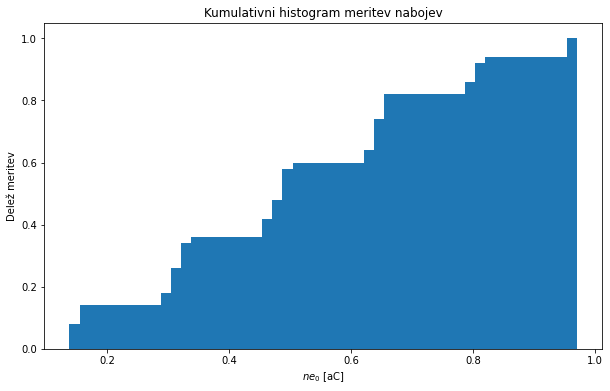

In [122]:
plt.figure()

#metoda1.hist(column='ne_0 [aC]',bins=6,grid=False)

plt.hist(metoda1['ne_0 [aC]'],cumulative=True, density=True, bins=len(metoda1))

plt.xlabel("$ne_0$ [aC]")
plt.ylabel("Delež meritev")
plt.title('Kumulativni histogram meritev nabojev')

plt.savefig('./grafi/kumulativni_hist_metoda1.jpg',dpi=200,bbox_inches='tight')

plt.show()

In [126]:
e_o = metoda1['e_0 [aC]'].mean(),metoda1['e_0 [aC]'].std()
e_o

(0.1425137409654711, 0.015155236946736622)

In [130]:
const.e

1.602176634e-19

## 2 metoda

In [153]:
metoda2 = pd.read_csv('./Millik_podatki/meritve/metoda2_U200_in_opis.txt',skiprows=5)
metoda2['r [um]'] = np.sqrt( 9*nu*(metoda2['v+ [um/s]']-metoda2['v- [um/s]']) / (4*rho_skp*g) ) / 10**(1.5)

metoda2['ne_0 [aC]'] = 3*np.pi*nu*metoda2['r [um]'] / 200 * d * (metoda2['v+ [um/s]']+metoda2['v- [um/s]'])/1000

metoda2['n'] = np.intc(np.round(metoda2['ne_0 [aC]']/metoda2['ne_0 [aC]'].min(),0))
metoda2 = metoda2.sort_values(by='ne_0 [aC]')
metoda2['e_0 [aC]'] = metoda2['ne_0 [aC]'] / metoda2['n']

names = ['$v_+$ [$\mu$m/s]','$v_-$ [$\mu$m/s]','r [$\mu$m]','$ne_0$ [aC]','n','$e_0$ [aC]']

print(metoda2.to_latex(escape=False,caption='Tabela po metodi 2',index=False,float_format="%.2f",header=names))

\begin{table}
\centering
\caption{Tabela po metodi 2}
\begin{tabular}{rrrrrr}
\toprule
$v_+$ [$\mu$m/s] & $v_-$ [$\mu$m/s] & r [$\mu$m] & $ne_0$ [aC] & n & $e_0$ [aC] \\
\midrule
           72.01 &            56.80 &       0.26 &        0.14 & 1 &       0.14 \\
           63.72 &            23.00 &       0.42 &        0.16 & 1 &       0.16 \\
           67.50 &             4.61 &       0.52 &        0.16 & 1 &       0.16 \\
           65.67 &            26.37 &       0.41 &        0.16 & 1 &       0.16 \\
           70.46 &             0.87 &       0.55 &        0.17 & 1 &       0.17 \\
           72.80 &             1.24 &       0.56 &        0.18 & 1 &       0.18 \\
          108.68 &            73.50 &       0.39 &        0.31 & 2 &       0.15 \\
           99.62 &            37.42 &       0.52 &        0.31 & 2 &       0.15 \\
           99.59 &            32.44 &       0.54 &        0.31 & 2 &       0.15 \\
          112.31 &            76.75 &       0.39 &        0.32 & 2 &      

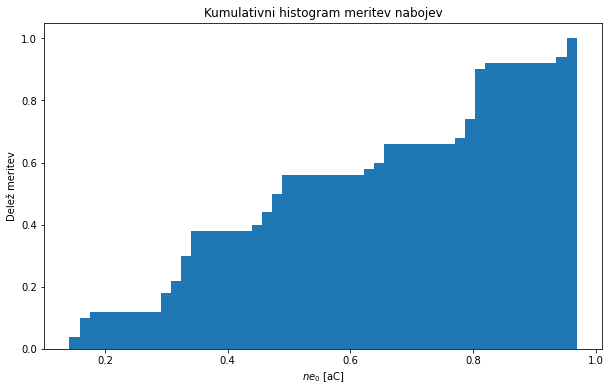

In [155]:
plt.figure()

plt.hist(metoda2['ne_0 [aC]'],cumulative=True, density=True, bins=len(metoda2))

plt.xlabel("$ne_0$ [aC]")
plt.ylabel("Delež meritev")
plt.title('Kumulativni histogram meritev nabojev')

plt.savefig('./grafi/kumulativni_hist_metoda2.jpg',dpi=200,bbox_inches='tight')

plt.show()

In [156]:
e_o = metoda2['e_0 [aC]'].mean(),metoda2['e_0 [aC]'].std()
e_o

(0.15014321033281455, 0.015043739150432178)